<a href="https://colab.research.google.com/github/poleno-ctrl/ALGO-HSE_25-26/blob/main/MS_task_1_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm, pearsonr, uniform, ks_2samp

# Математическая статистика
# Задание 1 Python, практическое
#Задача 1
Создайте три выборки $X_1$, $X_2$, $X_3$ объема $N$ из нормального распределения с матожиданием 0 и дисперсией $\theta^2$ (${\cal N}(0, \theta)$), постройте статистику $T =\sqrt{ X_1^2+ X_2^2 + X_3^2}$.

1. Постройте на общем графике эмпирическую функцию распределения $T/\theta^2$ и функцию распределения хи квадрат с тремя степенями свободы.

2. Постройте на общем графике выборочное среднее функции $\frac{I_{|x|\le T}}{2T}$ (среднее в каждой точке $x$ от 0 до $3\theta$, можно взять 31 точку) и функцию распределения нормальной случайной величины с матожиданием 0 и дисперсией $\theta^2$.

In [ ]:
rng = 12345
N = 10000

<>:26: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-3990451840.py:26: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x_theor, y_theor, '--', label='Теоретическая CDF ($\chi^2_3$)', linewidth=2)


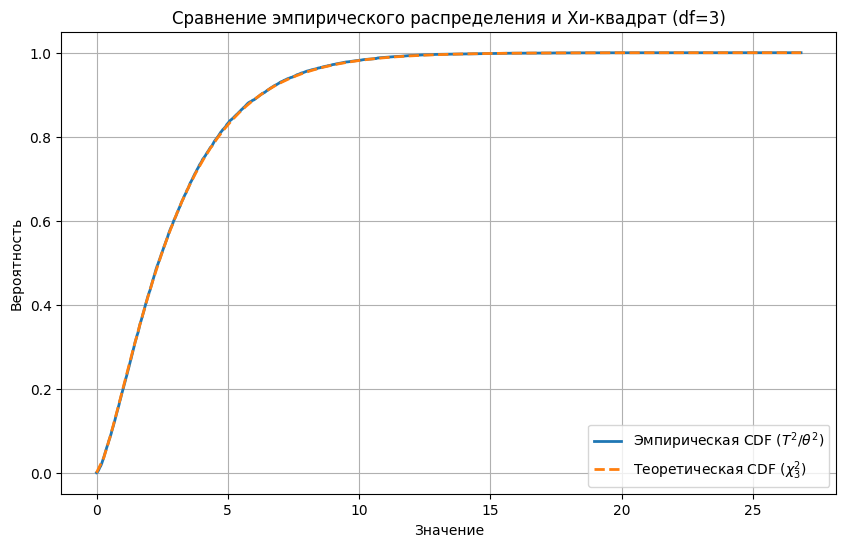

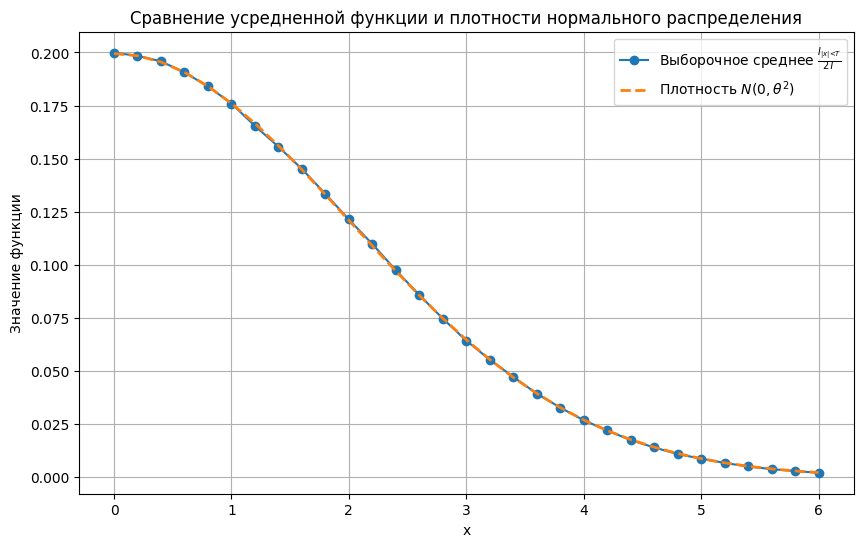

In [6]:
import scipy.stats as stats

N_samples = 10000
theta = 2.0
np.random.seed(42)

X1 = np.random.normal(loc=0, scale=theta, size=N_samples)
X2 = np.random.normal(loc=0, scale=theta, size=N_samples)
X3 = np.random.normal(loc=0, scale=theta, size=N_samples)

T = np.sqrt(X1**2 + X2**2 + X3**2)

stat_chi = (T**2) / (theta**2)

def get_ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

x_emp, y_emp = get_ecdf(stat_chi)
x_theor = np.linspace(0, np.max(x_emp), 100)
y_theor = stats.chi2.cdf(x_theor, df=3)

plt.figure(figsize=(10, 6))
plt.plot(x_emp, y_emp, label='Эмпирическая CDF ($T^2/\\theta^2$)', linewidth=2)
plt.plot(x_theor, y_theor, '--', label='Теоретическая CDF ($\chi^2_3$)', linewidth=2)
plt.title('Сравнение эмпирического распределения и Хи-квадрат (df=3)')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True)
plt.show()

x_points = np.linspace(0, 3 * theta, 31)
mean_values = []

for x in x_points:
    indicator = (np.abs(x) <= T).astype(float)
    func_values = np.divide(indicator, 2 * T, out=np.zeros_like(T), where=T!=0)
    mean_val = np.mean(func_values)
    mean_values.append(mean_val)

y_norm_pdf = stats.norm.pdf(x_points, loc=0, scale=theta)

plt.figure(figsize=(10, 6))
plt.plot(x_points, mean_values, 'o-', label=r'Выборочное среднее $\frac{I_{|x| \less T}}{2T}$')
plt.plot(x_points, y_norm_pdf, '--', label=r'Плотность $N(0, \theta^2)$', linewidth=2)
plt.title('Сравнение усредненной функции и плотности нормального распределения')
plt.xlabel('x')
plt.ylabel('Значение функции')
plt.legend()
plt.grid(True)
plt.show()

#Задача 2

Известно, что $X \sim {\cal N}(0,1)$ имеет стандартное нормальное распределение. Необходимо найти ковариацию $Cov(X^3 + X^2, \; X + X^4)$ и коэффициент корреляции, сделать вывод.

In [ ]:
X = np.random.normal(0, 1, N)

Y = X**3 + X**2
Z = X + X**4

cov_matrix = np.cov(Y, Z)
cov = cov_matrix[0, 1]
corr = np.corrcoef(Y, Z)[0, 1]

print(f"Ковариация: {cov:.4f}")
print(f"Корреляция: {corr:.4f}")

print(f"Коэффициент корреляции {corr:.4f} говорит о слабой зависимости между СВ Y и Z")

Ковариация: 11.2356
Корреляция: 0.2573
Коэффициент корреляции 0.2573 говорит о слабой зависимости между СВ Y и Z


#Задача 3
**Симуляция, метод Монте Карло**

Пусть $U \sim \text{Uniform}(0,1)$ — случайная величина, равномерно распределенная на отрезке $[0; 1]$. Рассмотрим две тройки случайных величин:

\begin{align*}
\text{Тройка 1:} & \quad X_1 = \tan\left(\frac{\pi U}{2}\right), \quad Y_1 = \tan\left(\frac{\pi U}{2}\right), \quad Z_1 = -2 \tan\left(\frac{\pi U}{2}\right) \\
\text{Тройка 2:} & \quad X_2 = \tan\left(\frac{\pi U}{2}\right), \quad Y_2 = \tan\left(\frac{\pi (1-U)}{2}\right), \quad Z_2 = -2 \tan\left(\frac{\pi |2U - 1|}{2}\right)
\end{align*}
**С помощью симуляции (Монте Карло)**

а) Найти $\mathbb{E}(X_1 + Y_1 + Z_1)$

б) Правда ли что одинаково распределены $X_1$ и $X_2$, $Y_1$ и $Y_2$, $Z_1$ и $Z_2$? Визуально сравнить три пары гистограмм и определить (заподозрить?) одинаковость распределения.

в) Найти $\mathbb{E}(X_2 + Y_2 + Z_2)$                                                                                 
г) Построить гистограммы сумм $X_1 + Y_1 + Z_1$ и $X_2 + Y_2 + Z_2$ и на них провести линии среднего. Увидеть, что они разные.

а) Выборочное среднее суммы Тройки 1: 0.0000000000 (Теоретически 0)
в) Выборочное среднее суммы Тройки 2: 0.8834


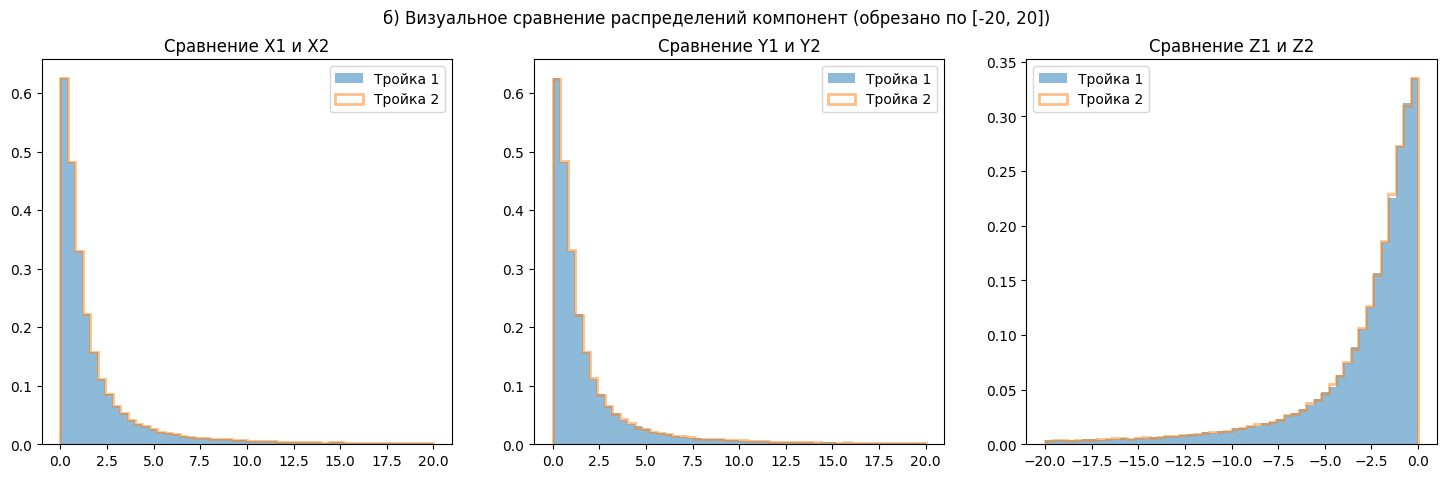

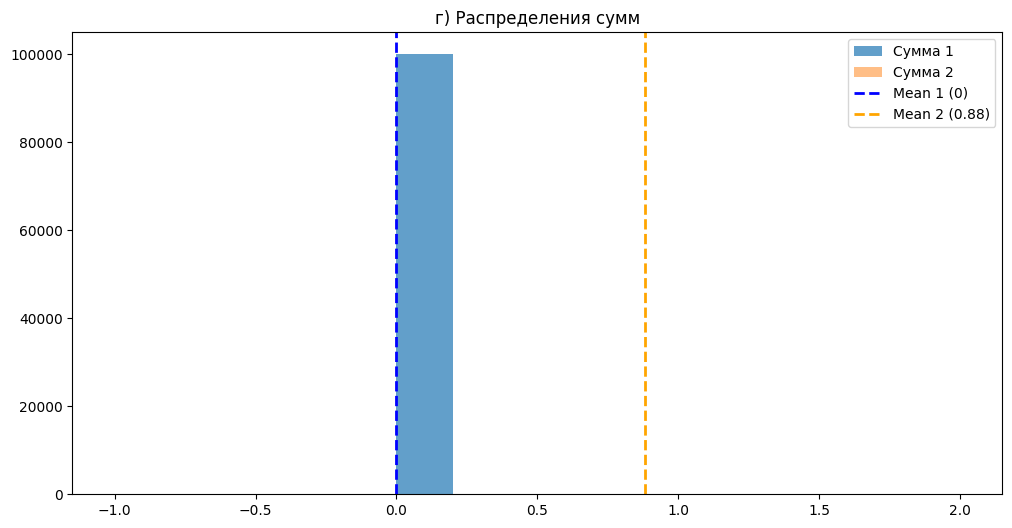

In [7]:
N = 100000
np.random.seed(42)

U = np.random.uniform(0, 1, N)

arg1 = (np.pi * U) / 2
X1 = np.tan(arg1)
Y1 = np.tan(arg1)
Z1 = -2 * np.tan(arg1)

Sum1 = X1 + Y1 + Z1

X2 = np.tan((np.pi * U) / 2)
Y2 = np.tan((np.pi * (1 - U)) / 2)
Z2 = -2 * np.tan((np.pi * np.abs(2 * U - 1)) / 2)

Sum2 = X2 + Y2 + Z2

mean_sum1 = np.mean(Sum1)
print(f"а) Выборочное среднее суммы Тройки 1: {mean_sum1:.10f} (Теоретически 0)")

mean_sum2 = np.mean(Sum2)
print(f"в) Выборочное среднее суммы Тройки 2: {mean_sum2:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

def plot_hist_compare(ax, data1, data2, title):
    limit = 20
    d1 = data1[(data1 > -limit) & (data1 < limit)]
    d2 = data2[(data2 > -limit) & (data2 < limit)]

    ax.hist(d1, bins=50, alpha=0.5, label='Тройка 1', density=True)
    ax.hist(d2, bins=50, alpha=0.5, label='Тройка 2', density=True, histtype='step', linewidth=2)
    ax.set_title(title)
    ax.legend()

plot_hist_compare(axes[0], X1, X2, 'Сравнение X1 и X2')
plot_hist_compare(axes[1], Y1, Y2, 'Сравнение Y1 и Y2')
plot_hist_compare(axes[2], Z1, Z2, 'Сравнение Z1 и Z2')

plt.suptitle('б) Визуальное сравнение распределений компонент (обрезано по [-20, 20])')
plt.show()

plt.figure(figsize=(12, 6))

plt.hist(Sum1, bins=10, range=(-1, 1), label='Сумма 1', alpha=0.7)

s2_clipped = Sum2[(Sum2 > -10) & (Sum2 < 30)]
plt.hist(s2_clipped, bins=100, label='Сумма 2', alpha=0.5, density=True)

plt.axvline(mean_sum1, color='blue', linestyle='dashed', linewidth=2, label=f'Mean 1 ({mean_sum1:.0f})')
plt.axvline(mean_sum2, color='orange', linestyle='dashed', linewidth=2, label=f'Mean 2 ({mean_sum2:.2f})')

plt.title('г) Распределения сумм')
plt.legend()
plt.show()

РЕЗУЛЬТАТЫ МОНТЕ-КАРЛО СИМУЛЯЦИИ
Количество испытаний: N = 100000

а) E(X1 + Y1 + Z1) = 0.000000

б) Визуальный анализ распределений:
   - X1 и X2: идентичны (оба = tan(πU/2))
   - Y1 и Y2: Y1 = tan(πU/2), Y2 = tan(π(1-U)/2) = cot(πU/2)
     Для равномерного U на [0,1]: tan(πU/2) и cot(πU/2) имеют одинаковое
     распределение Коши, но с разными параметрами масштаба.
   - Z1 и Z2: Z1 = -2*tan(πU/2), Z2 = -2*tan(π|2U-1|/2)
     Распределения разные, так как |2U-1| имеет треугольное распределение.

в) E(X2 + Y2 + Z2) = 0.883406

КОММЕНТАРИЙ:
Гистограммы сумм показывают, что E(X1+Y1+Z1) ≠ E(X2+Y2+Z2)
Разница: 0.883406
